# CSMODEL Project - Case Study
In this Notebook, we will be discussing and exploring the dataset about [Diabetes](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data) taken from the website Kaggle.

This dataset, sourced from the National Institute of Diabetes and Digestive and Kidney Diseases, aims to predict the presence of diabetes in patients using specific diagnostic measurements found in the dataset. It's important to note that the dataset was carefully curated, with specific criteria in mind. All the individuals included are female, at least 21 years of age, and of Pima Indian heritage.

**Members:**

Argamosa, Daniel Cedric (S12)

Donato, Adriel Joseph (S13)

Srivastava, Naman (S13)

## Dataset Collection Process and Implications
The dataset was gathered from the Pima Indian population near Phoenix, Arizona, a community under continuous study by the National Institute of Diabetes and Digestive and Kidney Diseases since 1965 due to its high incidence of diabetes. This dataset exclusively focuses on female individuals of at least 21 years of age who are of Pima Indian heritage, adhering to specific selection criteria. Now, the study that used this dataset employed a longitudinal approach, conducting standardized examinations every two years, which included an oral glucose tolerance test to diagnose diabetes. Diagnosis followed World Health Organization Criteria, ensuring clinical confirmation of diabetes cases. The dataset's thorough validation process establishes it as a reliable resource for investigating the prediction of diabetes onset over time.

Now, in terms of the possible implications this might have for the conclusions and insights there are a few. First, the dataset exclusively focuses on female individuals of Pima Indian heritage. Therefore, insights drawn from this dataset may not be generalizable to other populations. The findings would apply specifically to this demographic group. Second, the strict diagnostic criteria for diabetes diagnosis ensure that the individuals included in the dataset are accurately diagnosed cases, enhancing the reliability of the data for research purposes. Third, the dataset's age range restriction may limit its applicability to younger age groups. Lastly, the influence of Pima Indian heritage introduces genetic and cultural factors that may not be present to the same extent in other populations, further emphasizing the need for caution when extending conclusions beyond this specific demographic.

## The Dataset
The dataset `diabetes` has **768 participating female individuals** (rows) and has several variables (columns) related to them, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome). 

If you view the `.csv` file in Excel, you can see that our dataset contains many observations across **9 variables**. The following are the descriptions of each variable in the dataset:

- **`Pregnancies`**: To express the Number of pregnancies
- **`Glucose`**: To express the Glucose level in blood
- **`BloodPressure`**: To express the Blood pressure measurement (mm Hg)
- **`SkinThickness`**: To express the thickness of the skin (mm)
- **`Insulin`**: To express the Insulin level in blood (mu U/ml) 
- **`BMI`**: To express the Body mass index
- **`DiabetesPedigreeFunction`**: To express the Diabetes percentage
- **`Age`**: To express the age
- **`Outcome`**: To express the final result 1 is Yes and 0 is No

### **Imports:**

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **General Info:**

In [2]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Data Cleaning**

Check if the data types are correct:

In [6]:
data_types = df.dtypes
print(data_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Check for any missing values:

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Check for any duplicate rows:

In [8]:
df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [9]:
df.duplicated().sum()

0

Check if some values are set to a certain default value:

In [10]:
has_zeros = (df == 0).any()
cols = has_zeros[has_zeros].index
print(cols)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Outcome'],
      dtype='object')


- It makes sense for Pregnancies and Outcome to have 0s, but the rest may have it as an error or missing value as stated in the dataset description.

- In order for Imputation Techniques, checking the distribution for all the vairables that have 0 as it as an error or missing value.

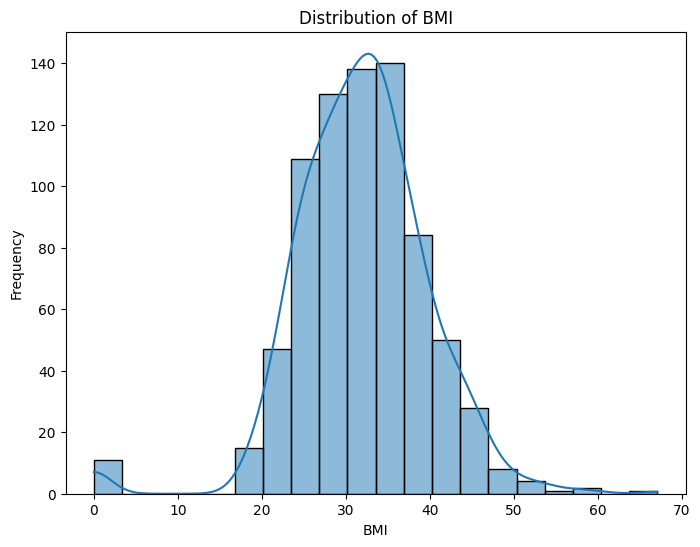

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

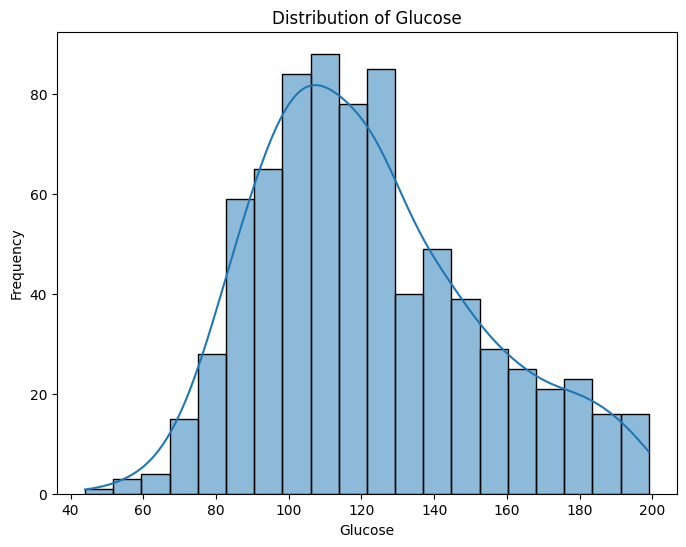

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

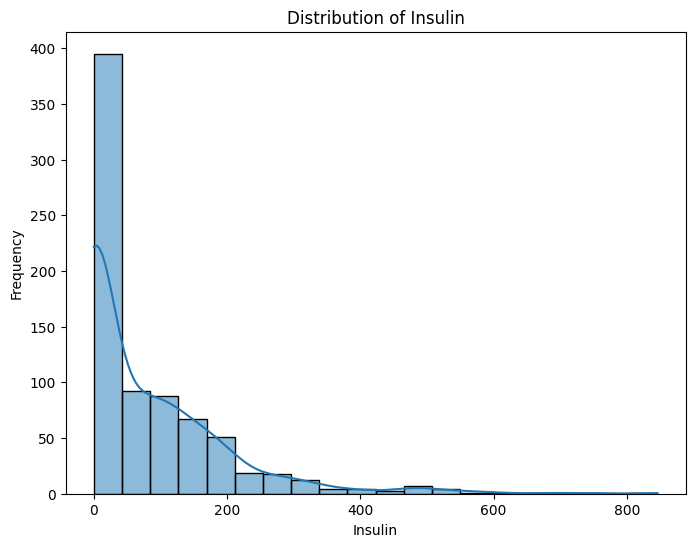

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin'], bins=20, kde=True)
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.show()

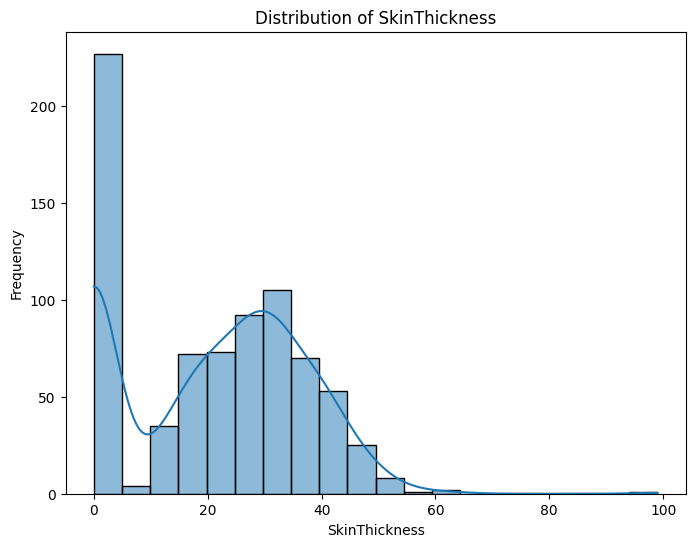

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['SkinThickness'], bins=20, kde=True)
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.show()

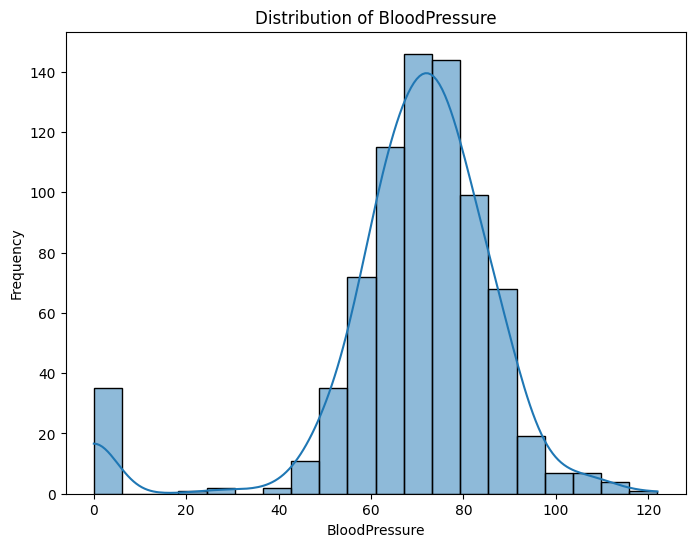

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BloodPressure'], bins=20, kde=True)
plt.title('Distribution of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.show()

- For Blood Pressure, Glucose the distribution is not Normal distributed, so the values of 0 will be replaced by Median

- For Insulin and Skin Thickness, due to the large number of 0 values, which may indicate errors or null values in the data, there is  option to either remove the rows containing the missing data or impute them using the median considering that their distributions are not normal.

- The decision that has been made was to retain and imputate the large missing values with their respective median values, for deleting the entire row will end up significantly reducing more than half of the given data set. Furthermore, the columns in question are significant to this fields of knowledge that the group has decided to make theories and proposals on.

Replace values of 0 for Median values:

In [16]:
filtered_df = df[df['BMI'] != 0] # Not counting the values of 0 for finding the Median
median_bmi = filtered_df['BMI'].median()
df['BMI'] = df['BMI'].replace(0, median_bmi)

In [17]:
filtered_df = df[df['Glucose'] != 0]
median_Glucose = filtered_df['Glucose'].median()
df['Glucose'] = df['Glucose'].replace(0, median_Glucose)

In [18]:
filtered_df = df[df['BloodPressure'] != 0]
median_BloodPressure = filtered_df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].replace(0, median_BloodPressure)

In [19]:
filtered_df = df[df['Insulin'] != 0]
median_Insulin = filtered_df['Insulin'].median()
df['Insulin'] = df['Insulin'].replace(0, median_Insulin)

In [20]:
filtered_df = df[df['SkinThickness'] != 0]
median_SkinThickness = filtered_df['SkinThickness'].median()
df['SkinThickness'] = df['SkinThickness'].replace(0, median_SkinThickness)

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Exploratory Data Analysis (EDA)**

- Identify at least 4 exploratory data analysis questions. Properly state the questions in the notebook. Having more than 4 questions is acceptable, especially if this will help in understanding the data better.
- Answer the EDA questions using both:
    - Numerical Summaries – measures of central tendency, measures of dispersion, and correlation
    - Visualization – Appropriate visualization should be used. Each visualization should be accompanied by a brief explanation.

###   Is there a relationship between `Glucose` and `Insulin`, in regards to the `BMI`?

To answer this question, the variables of interest are:
- **`Glucose`**: Glucose levels in blood
- **`Insulin`**: Insulin levels in blood
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

###   Is there a relationship between `Glucose` and the Diabetes `Outcome`?

To answer this question, the variables of interest are:
- **`Glucose`**: Glucose levels in blood
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

In [73]:
# Display Measures of Central Tendency and Dispersion
glucose_outcome_1 = df[df['Outcome'] == 1][['Glucose']]

glucose_outcome_1.describe()

,Glucose
count,268.000000
mean,142.130597
std,29.568839
min,78.000000
25%,119.000000
50%,140.000000
75%,167.000000
max,199.000000


In [76]:
median_glucose_outcome_1 = glucose_outcome_1['Glucose'].median()
variance_glucose_outcome_1 = glucose_outcome_1['Glucose'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_glucose_outcome_1, variance_glucose_outcome_1],
})

print(result_table)

  Parameter         BMI
0    Median  140.000000
1  Variance  874.316214


In [80]:
glucose_outcome_0 = df[df['Outcome'] == 0][['Glucose']]

glucose_outcome_0.describe()

,Glucose
count,500.000000
mean,110.682000
std,24.707201
min,44.000000
25%,93.000000
50%,107.500000
75%,125.000000
max,197.000000


In [77]:
median_glucose_outcome_0 = glucose_outcome_0['Glucose'].median()
variance_glucose_outcome_0 = glucose_outcome_0['Glucose'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_glucose_outcome_0, variance_glucose_outcome_0],
})

print(result_table)

  Parameter         BMI
0    Median  107.500000
1  Variance  610.445768


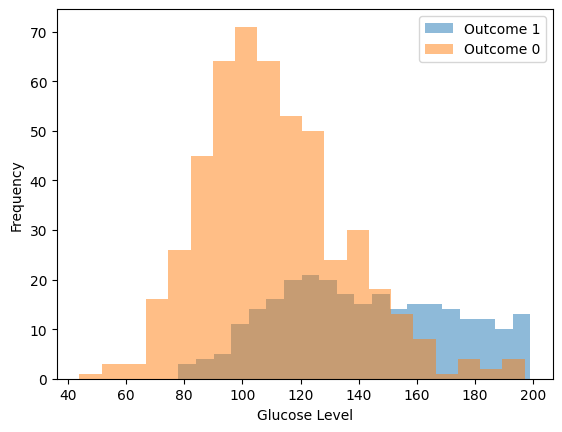

In [79]:
# Data Visualization
plt.hist(df[df['Outcome'] == 1]['Glucose'], alpha=0.5, label='Outcome 1', bins=20)
plt.hist(df[df['Outcome'] == 0]['Glucose'], alpha=0.5, label='Outcome 0', bins=20)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- Explanation:

### Is there a relationship between `BMI` and Diabetes `Outcome`?

To answer this question, the variables of interest are:
- **`BMI`**: To express the Body mass index
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

In [27]:
# Display Measures of Central Tendency and Dispersion
bmi_outcome_1 = df[df['Outcome'] == 1][['BMI']]

bmi_outcome_1.describe()

,BMI
count,268.000000
mean,35.383582
std,6.595603
min,22.900000
25%,30.900000
50%,34.250000
75%,38.775000
max,67.100000


In [58]:
median_bmi_outcome_1 = bmi_outcome_1['BMI'].median()
variance_bmi_outcome_1 = bmi_outcome_1['BMI'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_bmi_outcome_1, variance_bmi_outcome_1],
})

print(result_table)

  Parameter        BMI
0    Median  34.250000
1  Variance  43.501977


In [29]:
bmi_outcome_0 = df[df['Outcome'] == 0][['BMI']]

bmi_outcome_0.describe()

,BMI
count,500.000000
mean,30.885600
std,6.504128
min,18.200000
25%,25.750000
50%,30.400000
75%,35.300000
max,57.300000


In [59]:
median_bmi_outcome_0 = bmi_outcome_0['BMI'].median()
variance_bmi_outcome_0 = bmi_outcome_0['BMI'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_bmi_outcome_0, variance_bmi_outcome_0],
})

print(result_table)

  Parameter       BMI
0    Median  30.40000
1  Variance  42.30368


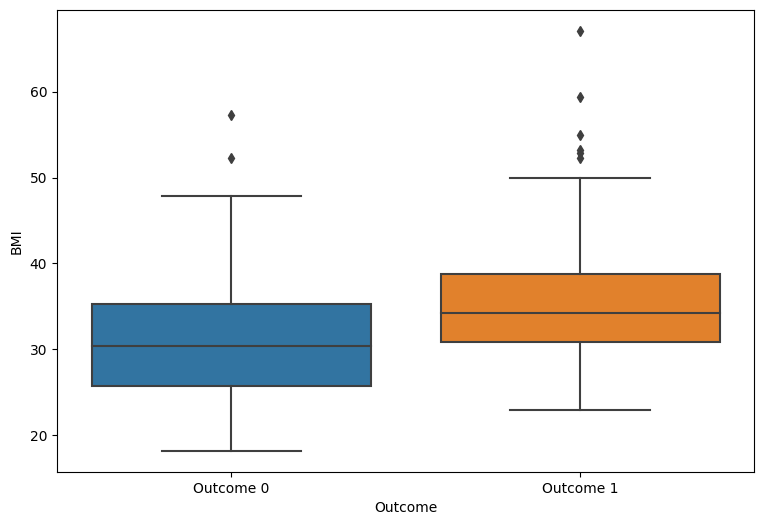

In [60]:
# Data Visualization
plt.figure(figsize=(9, 6))
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.ylabel('BMI')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()

- Explanation:

### Is there a relationship between `Pregnancies` and Diabetes `Outcome`?

To answer this question, the variables of interest are:
- **`Pregnancies`**: To express the Number of pregnancies
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

In [63]:
# Display Measures of Central Tendency and Dispersion
pregnancies_outcome_1 = df[df['Outcome'] == 1][['Pregnancies']]

pregnancies_outcome_1.describe()

,Pregnancies
count,268.000000
mean,4.865672
std,3.741239
min,0.000000
25%,1.750000
50%,4.000000
75%,8.000000
max,17.000000


In [64]:
median_pregnancies_outcome_1 = pregnancies_outcome_1['Pregnancies'].median()
variance_pregnancies_outcome_1 = pregnancies_outcome_1['Pregnancies'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_pregnancies_outcome_1, variance_pregnancies_outcome_1],
})

print(result_table)

  Parameter       BMI
0    Median   4.00000
1  Variance  13.99687


In [66]:
pregnancies_outcome_0 = df[df['Outcome'] == 0][['Pregnancies']]

pregnancies_outcome_0.describe()

,Pregnancies
count,500.000000
mean,3.298000
std,3.017185
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,13.000000


In [67]:
median_pregnancies_outcome_0 = pregnancies_outcome_0['Pregnancies'].median()
variance_pregnancies_outcome_0 = pregnancies_outcome_0['Pregnancies'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'BMI': [median_pregnancies_outcome_0, variance_pregnancies_outcome_0],
})

print(result_table)

  Parameter       BMI
0    Median  2.000000
1  Variance  9.103403


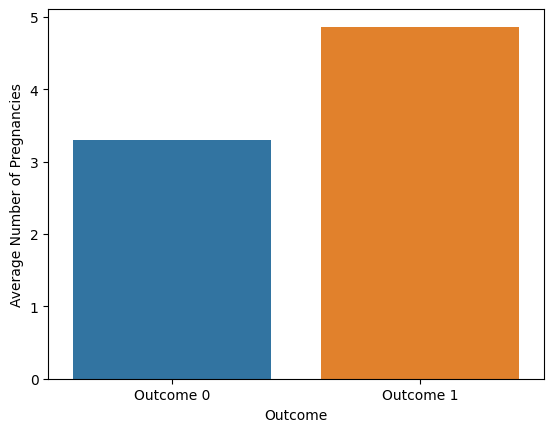

In [65]:
# Data Visualization
sns.barplot(x='Outcome', y='Pregnancies', data=df, errorbar=None)
plt.ylabel('Average Number of Pregnancies')
plt.xticks([0, 1], ['Outcome 0', 'Outcome 1'])
plt.show()

- Explanation: 

###   Is there a relationship between `Glucose` and `Insulin`, in regards to the `Outcome`?

To answer this question, the variables of interest are:
- **`Glucose`**: Glucose levels in blood
- **`Insulin`**: Insulin levels in blood
- **`Outcome`**: Expression if diabetes was confirmed (1) or not (0)

Their relationship if the patient has no Diabetes:

In [43]:
# Display Columns
glucose_insulin_0 = df[df['Outcome'] == 0][['Glucose', 'Insulin']]
glucose_insulin_0

,Glucose,Insulin
1,85,125
3,89,94
5,116,125
7,115,125
10,110,125
...,...,...
762,89,125
763,101,180
764,122,125
765,121,112


In [44]:
# Display Measures of Central Tendency and Dispersion
glucose_insulin_0.describe()

,Glucose,Insulin
count,500.000000,500.000000
mean,110.682000,127.792000
std,24.707201,74.447469
min,44.000000,15.000000
25%,93.000000,95.000000
50%,107.500000,125.000000
75%,125.000000,125.000000
max,197.000000,744.000000


In [45]:
median_glucose = glucose_insulin_0['Glucose'].median()
variance_glucose = glucose_insulin_0['Glucose'].var()

median_insulin = glucose_insulin_0['Insulin'].median()
variance_insulin = glucose_insulin_0['Insulin'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose, variance_glucose],
    'Insulin': [median_insulin, variance_insulin]
})

print(result_table)

  Parameter     Glucose      Insulin
0    Median  107.500000   125.000000
1  Variance  610.445768  5542.425587


In [46]:
# Display Correlation
glucose_insulin_0.corr()

,Glucose,Insulin
Glucose,1.000000,0.443959
Insulin,0.443959,1.000000


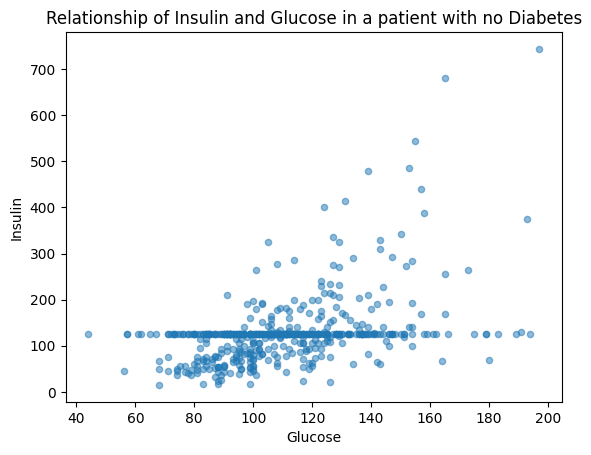

In [69]:
# Data Visualization
glucose_insulin_0.plot.scatter(x='Glucose', y='Insulin', alpha=0.5)
plt.title('Relationship of Insulin and Glucose in a patient with no Diabetes')
plt.show()

- From this graph and the correlation coefficient of `0.443959` being above 0, a positive correlation is shown between Insulin and Glucose, as their levels increase according to the other. This means that for patients with no diabetes, their glucose levels match their insulin levels as they consume food

Their relationship if the patient has Diabetes:

In [48]:
# Display Columns
glucose_insulin_1 = df[df['Outcome'] == 1][['Glucose', 'Insulin']]
glucose_insulin_1

,Glucose,Insulin
0,148,125
2,183,125
4,137,168
6,78,88
8,197,543
...,...,...
755,128,110
757,123,125
759,190,125
761,170,125


In [49]:
# Display Measures of Central Tendency and Dispersion
glucose_insulin_1.describe()

,Glucose,Insulin
count,268.000000,268.000000
mean,142.130597,164.701493
std,29.568839,100.932249
min,78.000000,14.000000
25%,119.000000,125.000000
50%,140.000000,125.000000
75%,167.000000,167.250000
max,199.000000,846.000000


In [50]:
median_glucose = glucose_insulin_1['Glucose'].median()
variance_glucose = glucose_insulin_1['Glucose'].var()

median_insulin = glucose_insulin_1['Insulin'].median()
variance_insulin = glucose_insulin_1['Insulin'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose': [median_glucose, variance_glucose],
    'Insulin': [median_insulin, variance_insulin]
})

print(result_table)

  Parameter     Glucose       Insulin
0    Median  140.000000    125.000000
1  Variance  874.316214  10187.318799


In [51]:
# Display Correlation
glucose_insulin_1.corr()

,Glucose,Insulin
Glucose,1.000000,0.296034
Insulin,0.296034,1.000000


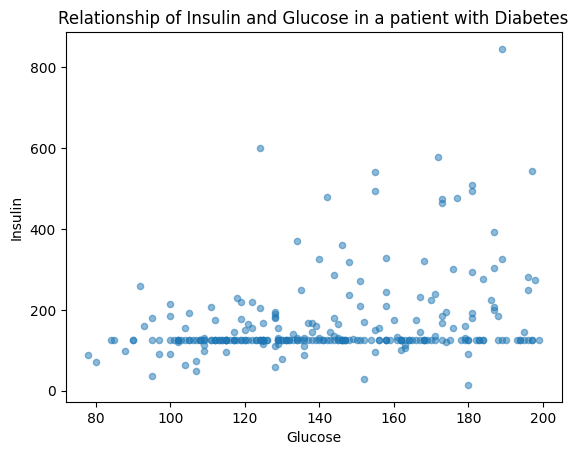

In [52]:
# Data Visualization
glucose_insulin_1.plot.scatter(x='Glucose', y='Insulin', alpha=0.5)
plt.title('Relationship of Insulin and Glucose in a patient with Diabetes')
plt.show()

- Due to their correlation coefficient of `0.296034` being positive and that most points in the graph are moving upwards as, a positive correlation is present between Insulin and Glucose of patients with diabetes. This means that their insulin levels in their bloodstream rise in accordance with their glucose levels.

Direct Comparison:

In [53]:
# Display Columns
GIO = df[['Glucose', 'Insulin', 'Outcome']]
GIO

,Glucose,Insulin,Outcome
0,148,125,1
1,85,125,0
2,183,125,1
3,89,94,0
4,137,168,1
...,...,...,...
763,101,180,0
764,122,125,0
765,121,112,0
766,126,125,1


In [54]:
# Display Measures of Central Tendency and Dispersion
GIO.describe()

,Glucose,Insulin,Outcome
count,768.000000,768.000000,768.000000
mean,121.656250,140.671875,0.348958
std,30.438286,86.383060,0.476951
min,44.000000,14.000000,0.000000
25%,99.750000,121.500000,0.000000
50%,117.000000,125.000000,0.000000
75%,140.250000,127.250000,1.000000
max,199.000000,846.000000,1.000000


In [55]:
GIO_0 = GIO[GIO['Outcome'] == 0][['Glucose', 'Insulin']]
GIO_1 = GIO[GIO['Outcome'] == 1][['Glucose', 'Insulin']]

median_glucose_0 = GIO_0['Glucose'].median()
variance_glucose_0 = GIO_0['Glucose'].var()
median_insulin_0 = GIO_0['Insulin'].median()
variance_insulin_0 = GIO_0['Insulin'].var()

median_glucose_1 = GIO_1['Glucose'].median()
variance_glucose_1 = GIO_1['Glucose'].var()
median_insulin_1 = GIO_1['Insulin'].median()
variance_insulin_1 = GIO_1['Insulin'].var()

result_table = pd.DataFrame({
    'Parameter': ['Median', 'Variance'],
    'Glucose (0)': [median_glucose_0, variance_glucose_0],
    'Insulin (0)': [median_insulin_0, variance_insulin_0],
    'Glucose (1)': [median_glucose_1, variance_glucose_1],
    'Insulin (1)': [median_insulin_1, variance_insulin_1]
})

print(result_table)

  Parameter  Glucose (0)  Insulin (0)  Glucose (1)   Insulin (1)
0    Median   107.500000   125.000000   140.000000    125.000000
1  Variance   610.445768  5542.425587   874.316214  10187.318799


In [56]:
# Display Correlation
GIO.corr()

,Glucose,Insulin,Outcome
Glucose,1.000000,0.419451,0.492782
Insulin,0.419451,1.000000,0.203790
Outcome,0.492782,0.203790,1.000000


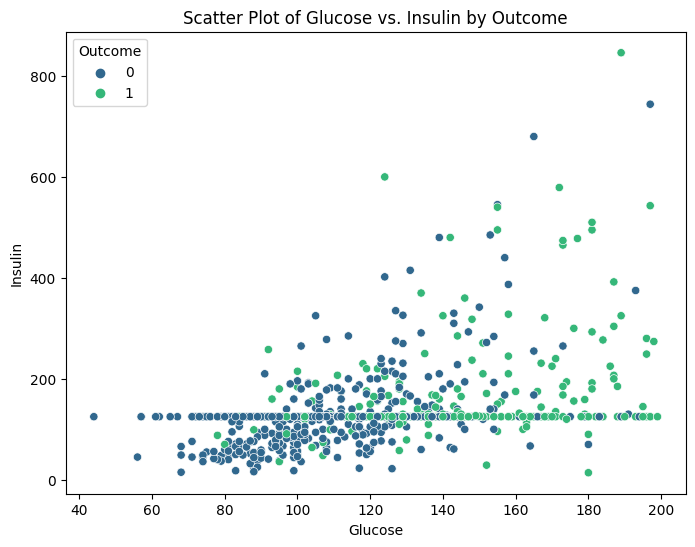

In [57]:
# Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df, palette='viridis')
plt.title("Scatter Plot of Glucose vs. Insulin by Outcome")
plt.show()

- From this combined graph, we see that patients with no diabetes have a higher positive correlation than those with it. A possible conclusion from this is that patients with diabetes have far more unique cases when considering their glucose and insulin levels. However it is worth noting that in the chart, patients with diabetes seem to have more insulin and glucose in their bloodstream, than those who don't have diabetes.